In [1]:
import os
import datetime
import numpy as np
from netCDF4 import Dataset
import pandas as pd
from tqdm import tqdm
import string
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy 
import cartopy.crs as ccrs

In [2]:
def cal_ObjFreq(res_TarGrid):
    '''
    res_TarGrid: resolution of target grid
    return: ObjectFrequency, Lat, Lon, dataset for plot
    '''
    sPlotFile = '/glade/u/home/mingge/EURO-CORDEX/'
    dir_0  = '/glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/' 

    dir_0 = dir_0 + 'TarGrid.'+ str(res_TarGrid)+ '/'

    dir_11 = dir_0 + 'EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/annual_feature_frequ/'
    dir_44 = dir_0 + 'EUR-44/evaluation/ECMWF-ERAINT/r1i1p1/annual_feature_frequ/'

    dataset = ['ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM5-0-6',
            'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA',
            'ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G',
            'ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1',
            'ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-6',
            'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05']

    dir_ds = [dir_44,dir_44,dir_44,dir_11,dir_11,dir_11]
 
    n_ds = len(dataset)
    
    ## read grid info
    flnm = dir_0 + 'EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/200001_ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05_ObjectMasks_dt-3h_PRTr-2_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-4_CLA-40000_IVTTr-500_IVTt-9.nc' 
    ncid = Dataset(flnm)
    Lat=np.squeeze(ncid.variables['lat'][:])
    Lon=np.squeeze(ncid.variables['lon'][:])
    nx = Lon.shape[0]
    ny = Lon.shape[1]
    ncid.close()
    print('grid is from ', flnm)
    
    Objects = ['Cyclones','Anticyclones','Precipitation','Anviles','Fronts', 'AR', 'MS'] 
    n_obj = len(Objects)
    
    days = 365

    ObjectFrequency = np.zeros((n_ds, nx, ny, n_obj))
    ObjectFrequency[:] = np.nan
    
    for ds in range(len(dataset)):
        print(dataset[ds])
        if dataset[ds] == 'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA':
            year_s = 1991 
        elif dataset[ds] == 'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05':
            year_s = 1983 
        else:
            year_s = 1979

        year_e = 2010
        n_year = year_e - year_s + 1
        Years = range(year_s, year_e+1)
    
        annualObjectFrequency = np.zeros((n_year, nx, ny, n_obj))
        annualObjectFrequency[:] = np.nan

        for year in Years:
            flnm = dir_ds[ds] + str(year) + "_" + dataset[ds] + '_annual_feature_frequ.npz'
            #print(ds, flnm)
        
            DATA = np.load(flnm)
            mean_cy = DATA['mean_cy']
            mean_acy = DATA['mean_acy']
            mean_pr = DATA['mean_pr']
            mean_anvil = DATA['mean_anvil']
            mean_fr = DATA['mean_fr']
            mean_ar = DATA['mean_ar']
            mean_ms =  DATA['mean_ms']
        
            #print('Collect the annual frequency of objects')
            annualObjectFrequency[year-Years[0],:,:,Objects.index('Cyclones')] = mean_cy
            annualObjectFrequency[year-Years[0],:,:,Objects.index('Anticyclones')] = mean_acy
            annualObjectFrequency[year-Years[0],:,:,Objects.index('Precipitation')] = mean_pr
            annualObjectFrequency[year-Years[0],:,:,Objects.index('Anviles')] = mean_anvil
            annualObjectFrequency[year-Years[0],:,:,Objects.index('Fronts')] = mean_fr
            annualObjectFrequency[year-Years[0],:,:,Objects.index('AR')] = mean_ar
            annualObjectFrequency[year-Years[0],:,:,Objects.index('MS')] = mean_ms

        # annual average
        ObjectFrequency[ds] = np.nanmean(annualObjectFrequency, axis = 0)*days 
    return ObjectFrequency, Lat, Lon, dataset


In [3]:
ObjectFrequency_11, Lat_11, Lon_11, dataset = cal_ObjFreq('11')

grid is from  /glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/TarGrid.11/EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/200001_ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05_ObjectMasks_dt-3h_PRTr-2_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-4_CLA-40000_IVTTr-500_IVTt-9.nc
ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM5-0-6
ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA
ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G
ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-6
ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05


In [4]:
ObjectFrequency_44, Lat_44, Lon_44, dataset = cal_ObjFreq('44')

grid is from  /glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/TarGrid.44/EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/200001_ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05_ObjectMasks_dt-3h_PRTr-2_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-4_CLA-40000_IVTTr-500_IVTt-9.nc
ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM5-0-6
ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA
ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G
ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
ECMWF-ERAINT_evaluation_r1i1p1_ICTP-RegCM4-6
ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05


In [5]:
MIN     = [   4,         4,              1,            3,          1,    .1,   2]
Objects = ['Cyclones','Anticyclones','Precipitation','Anviles','Fronts','AR', 'MS'] 
n_obj = len(Objects)
level_s = [np.arange(0,100, 10), np.arange(0,140, 10), np.arange(0,12,1), np.arange(0, 60,6)
          ,np.arange(0,40,4),np.arange(0,5,0.5) ,np.arange(0, 40, 4)]
proj = ccrs.PlateCarree()


Cyclones


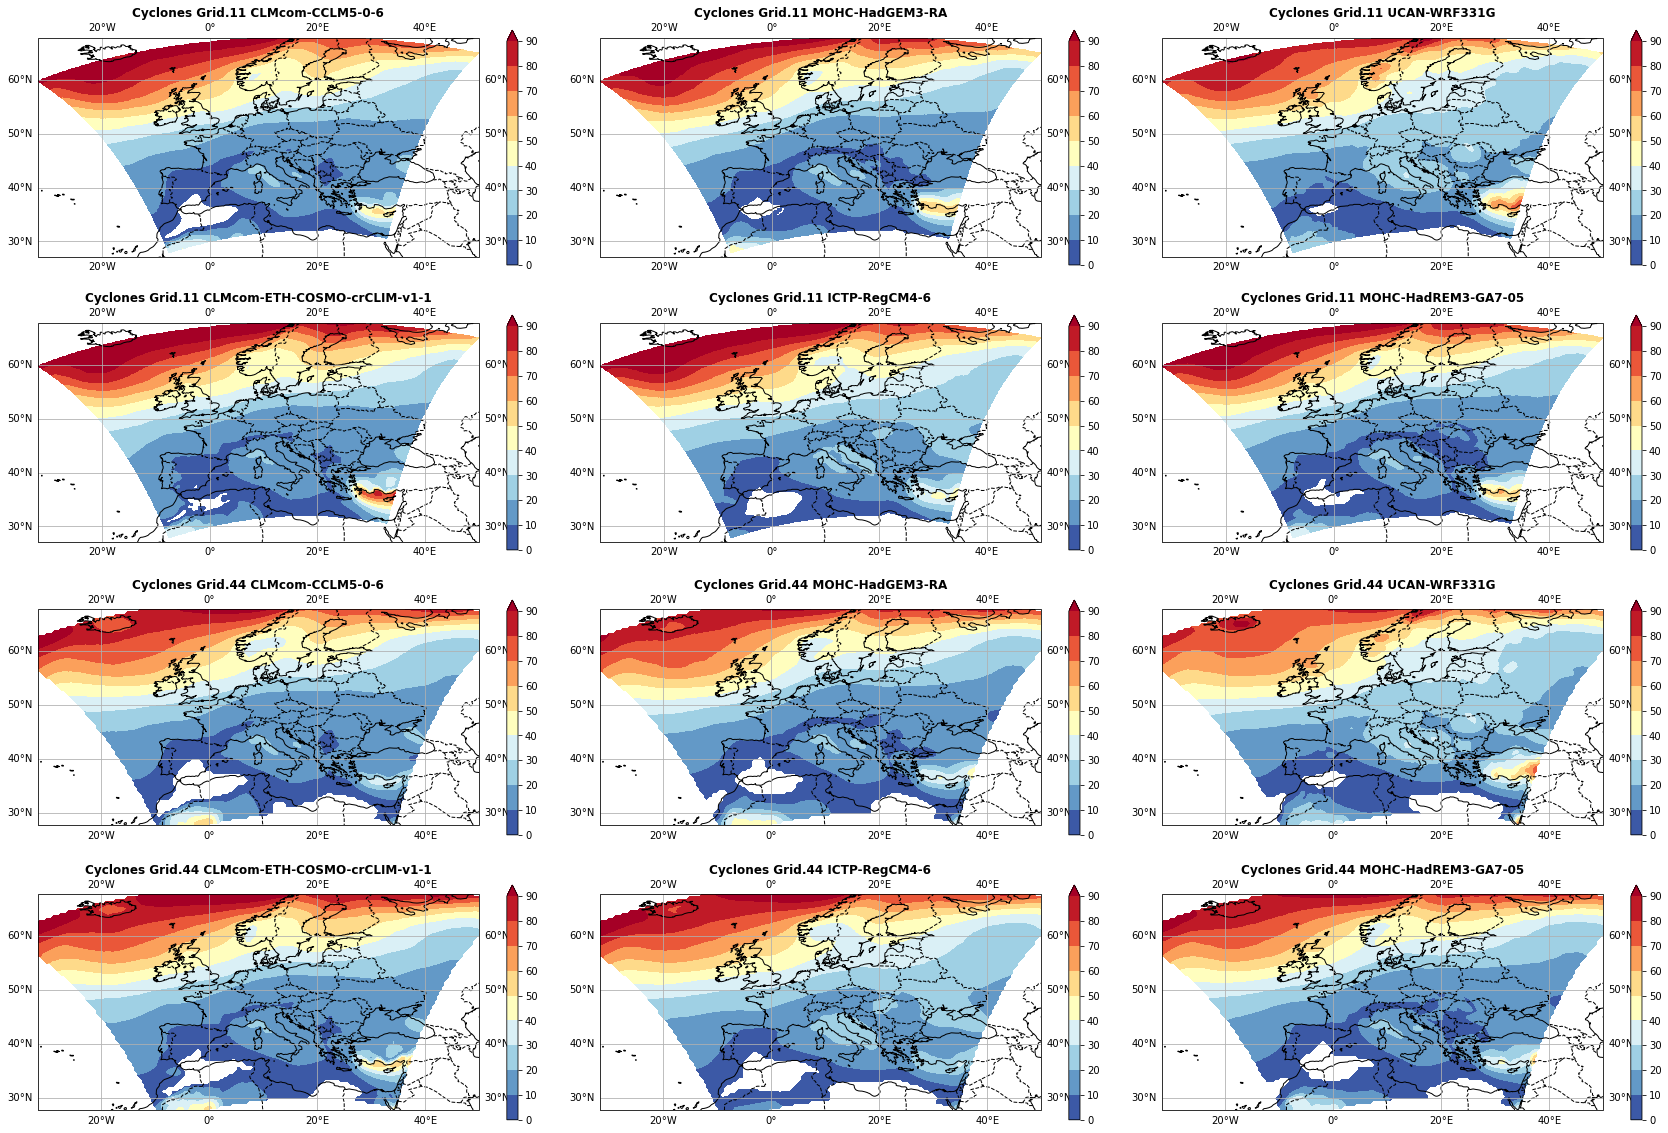

Anticyclones


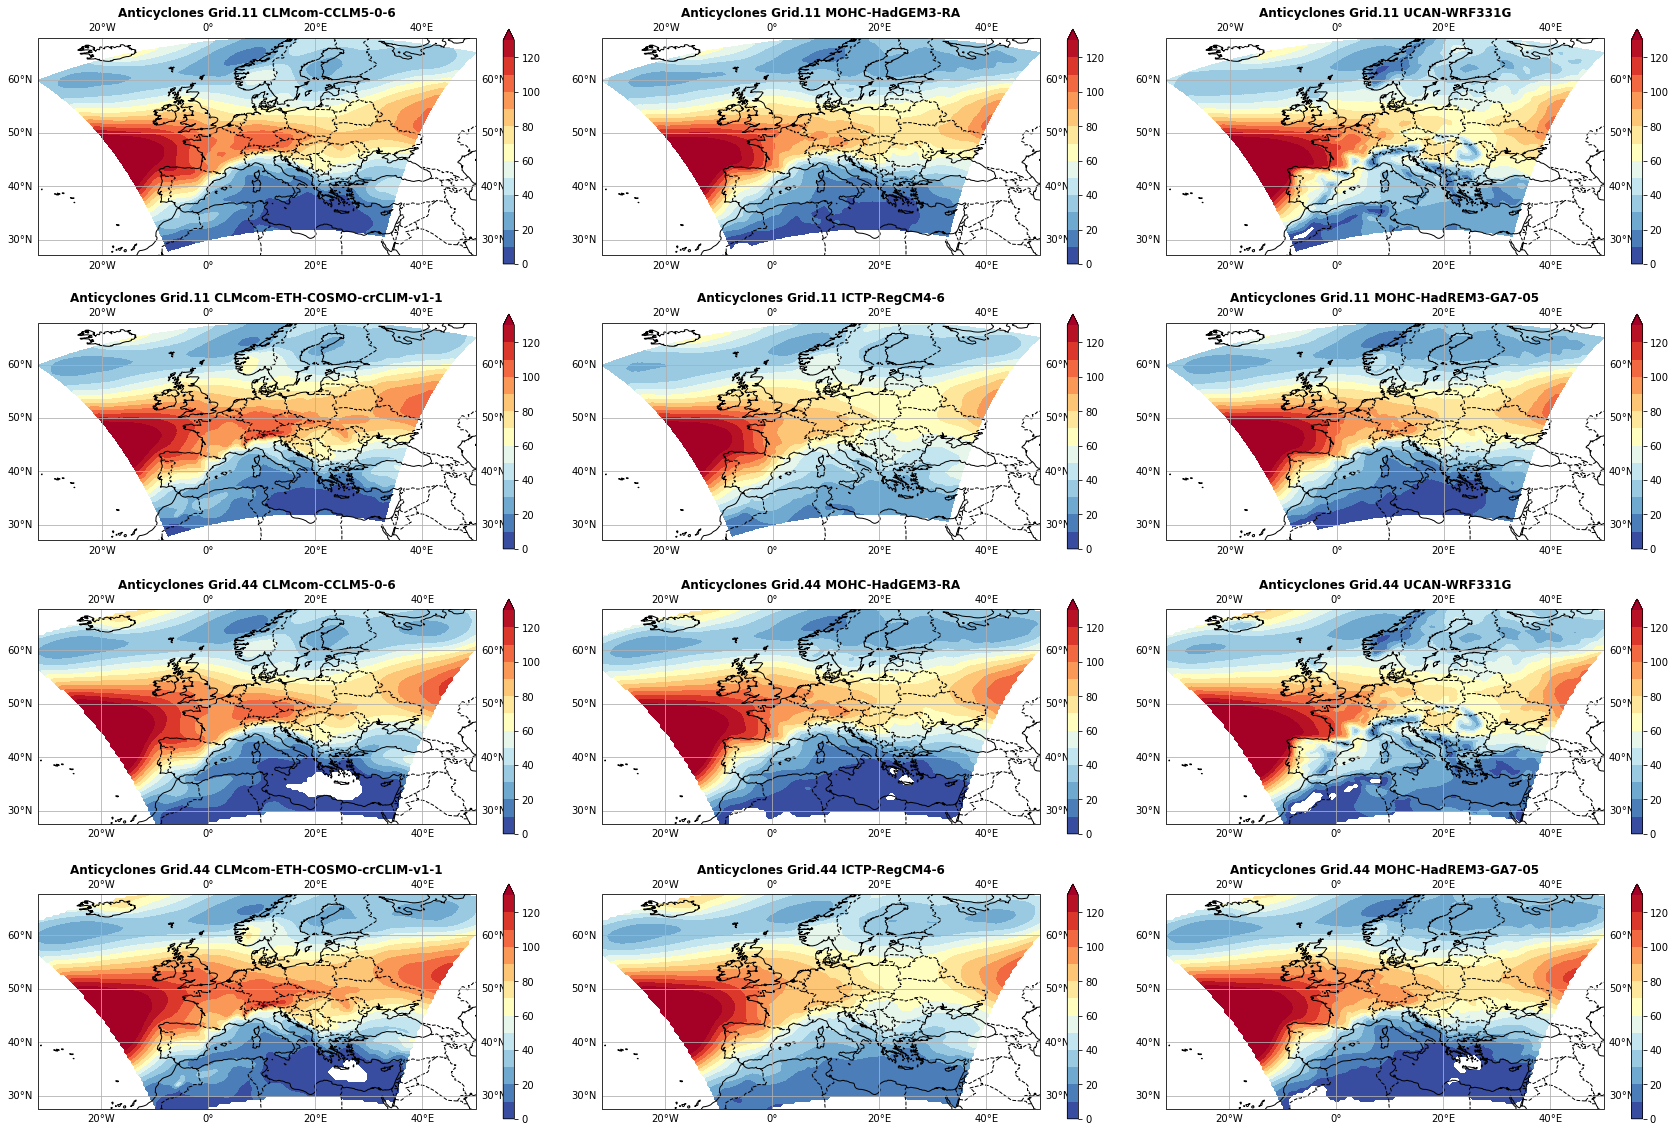

Precipitation


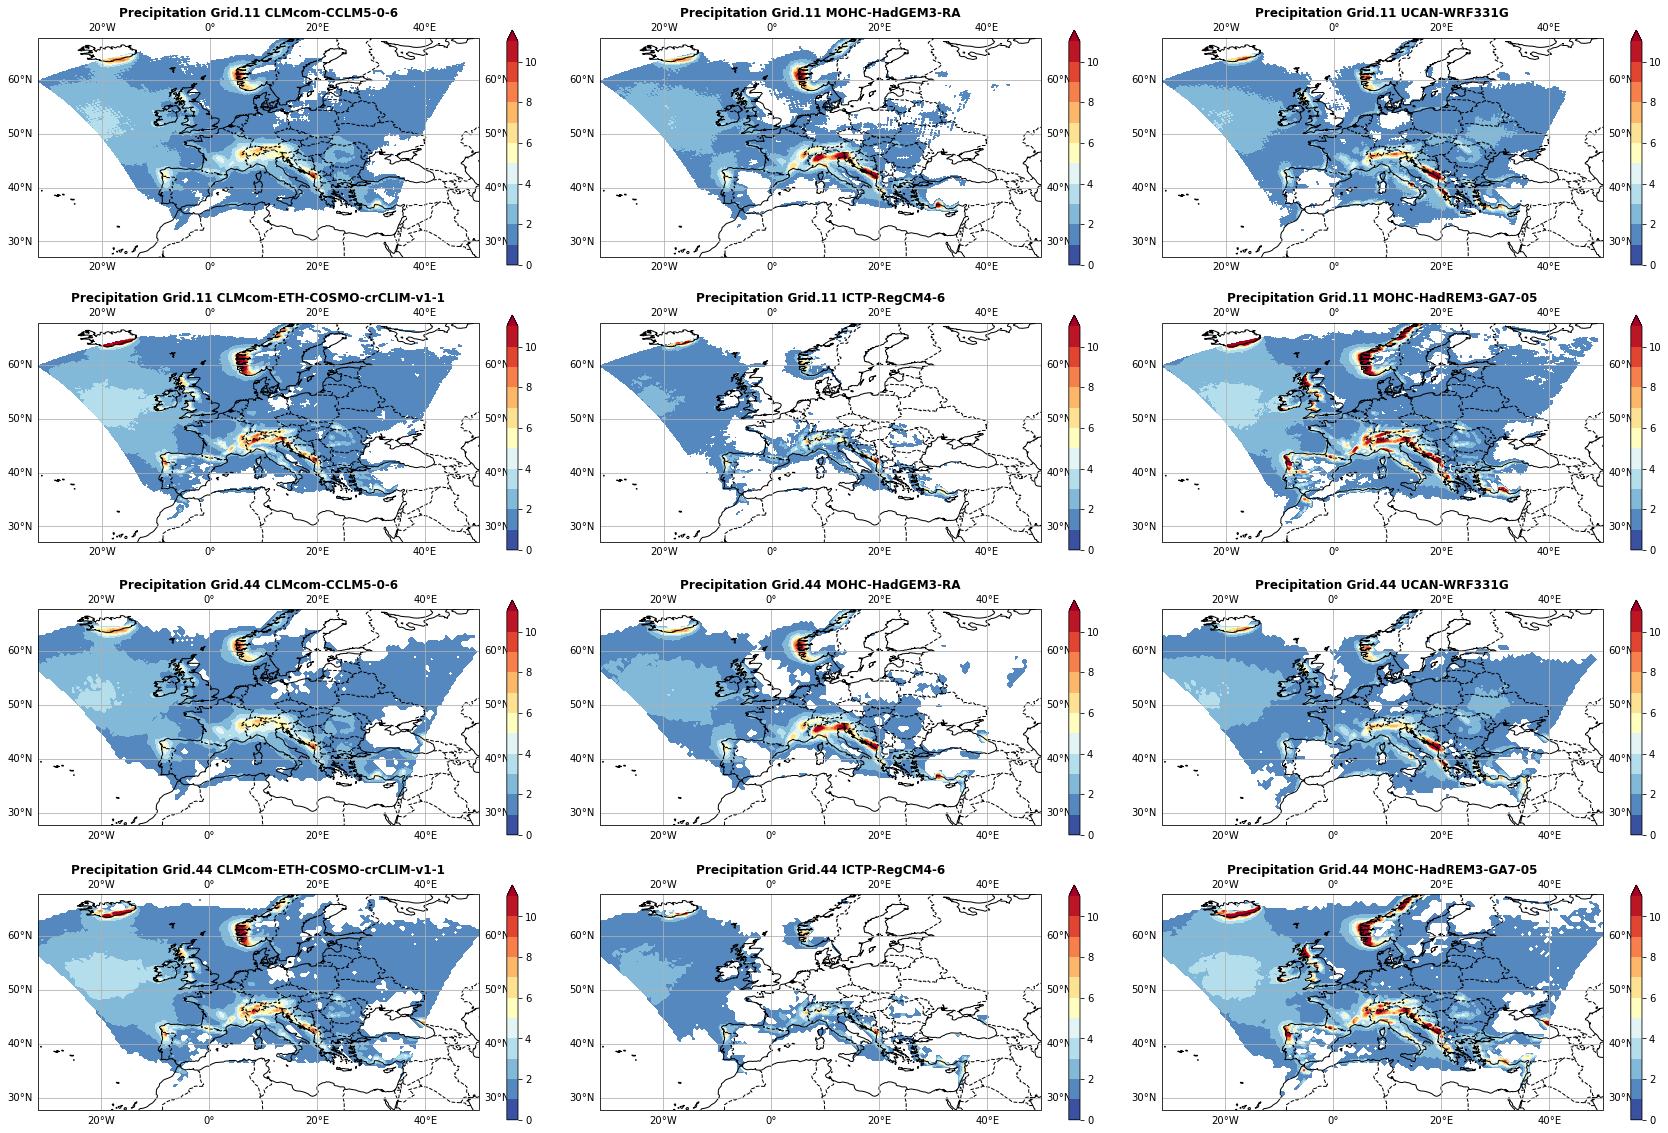

Anviles


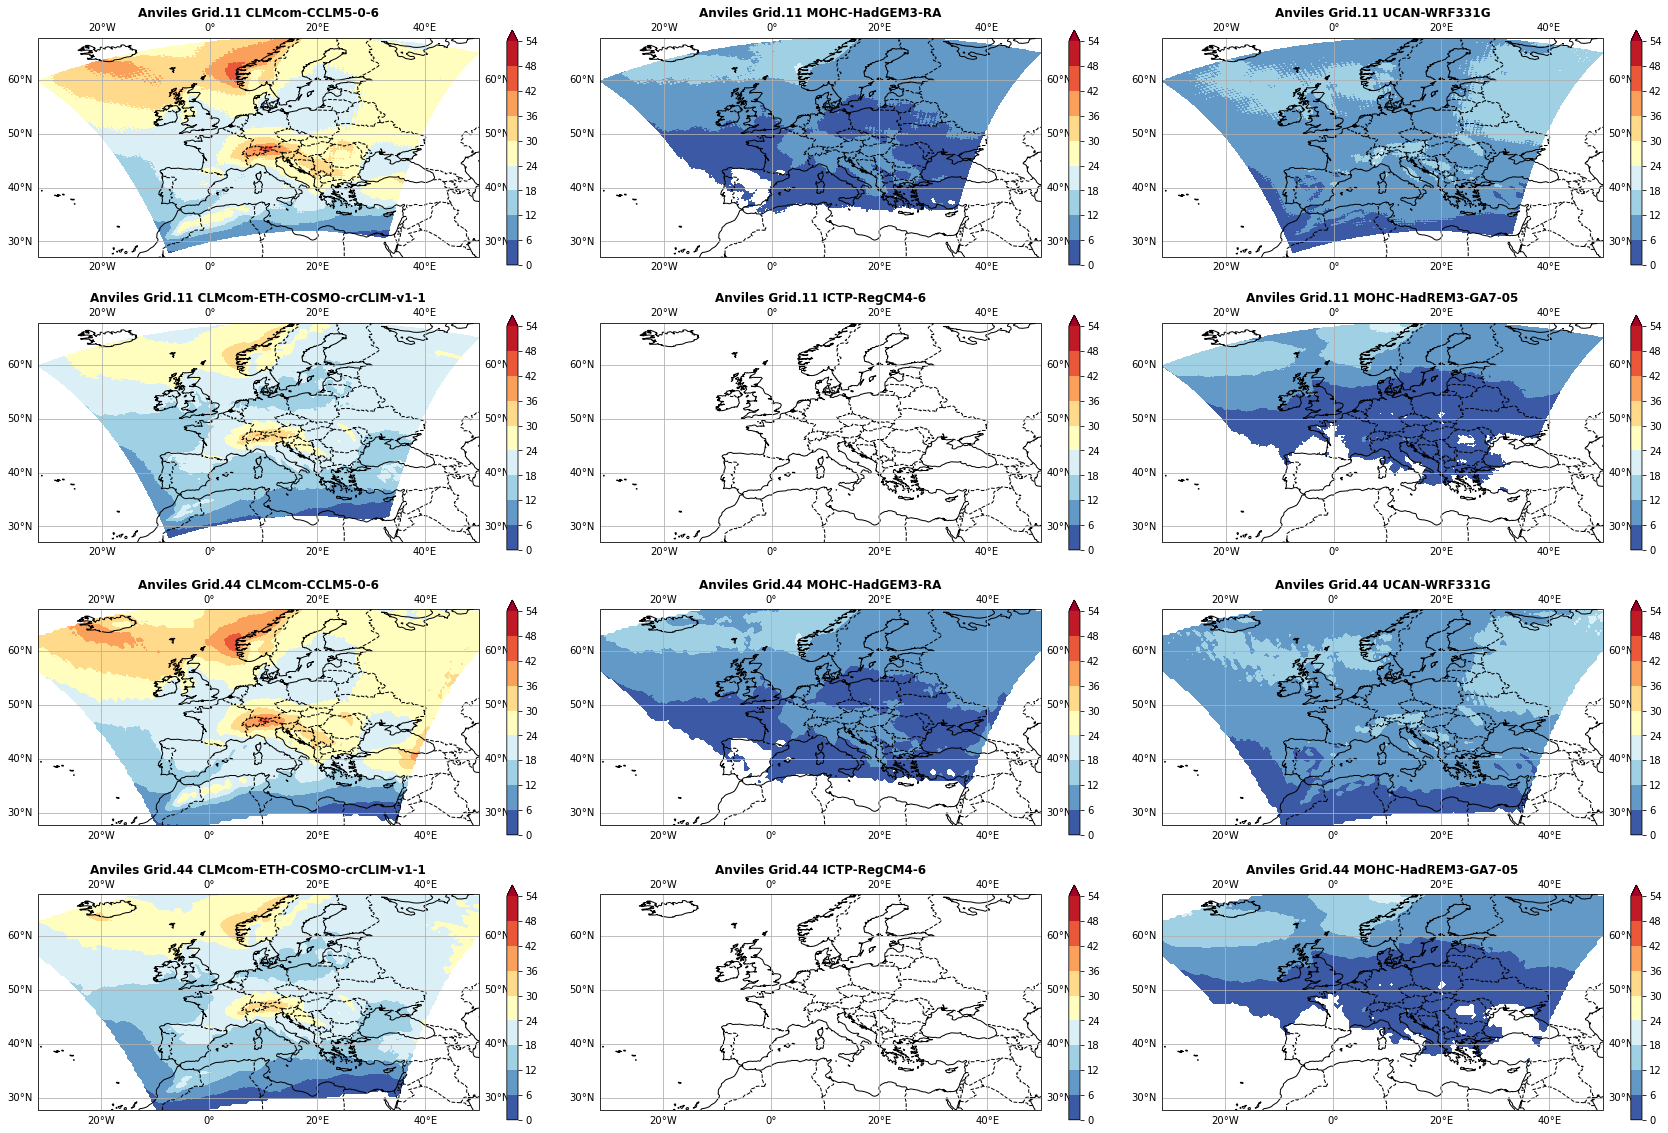

Fronts


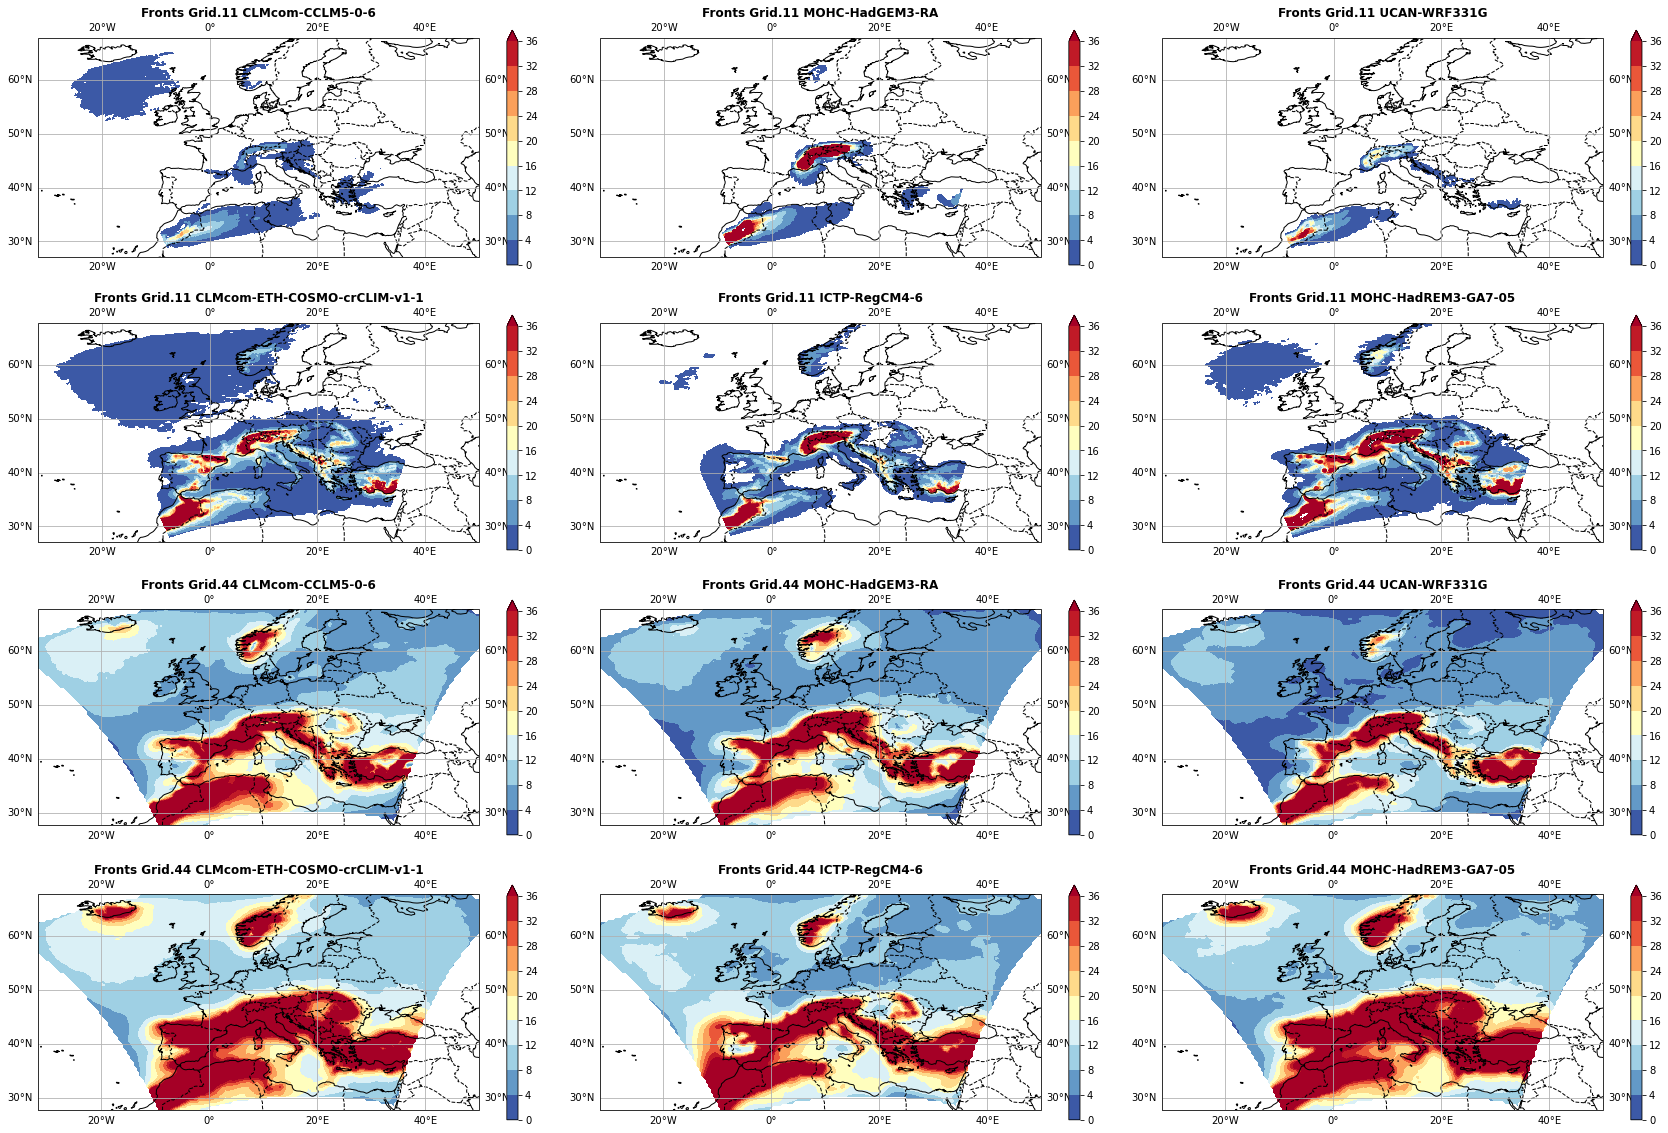

AR


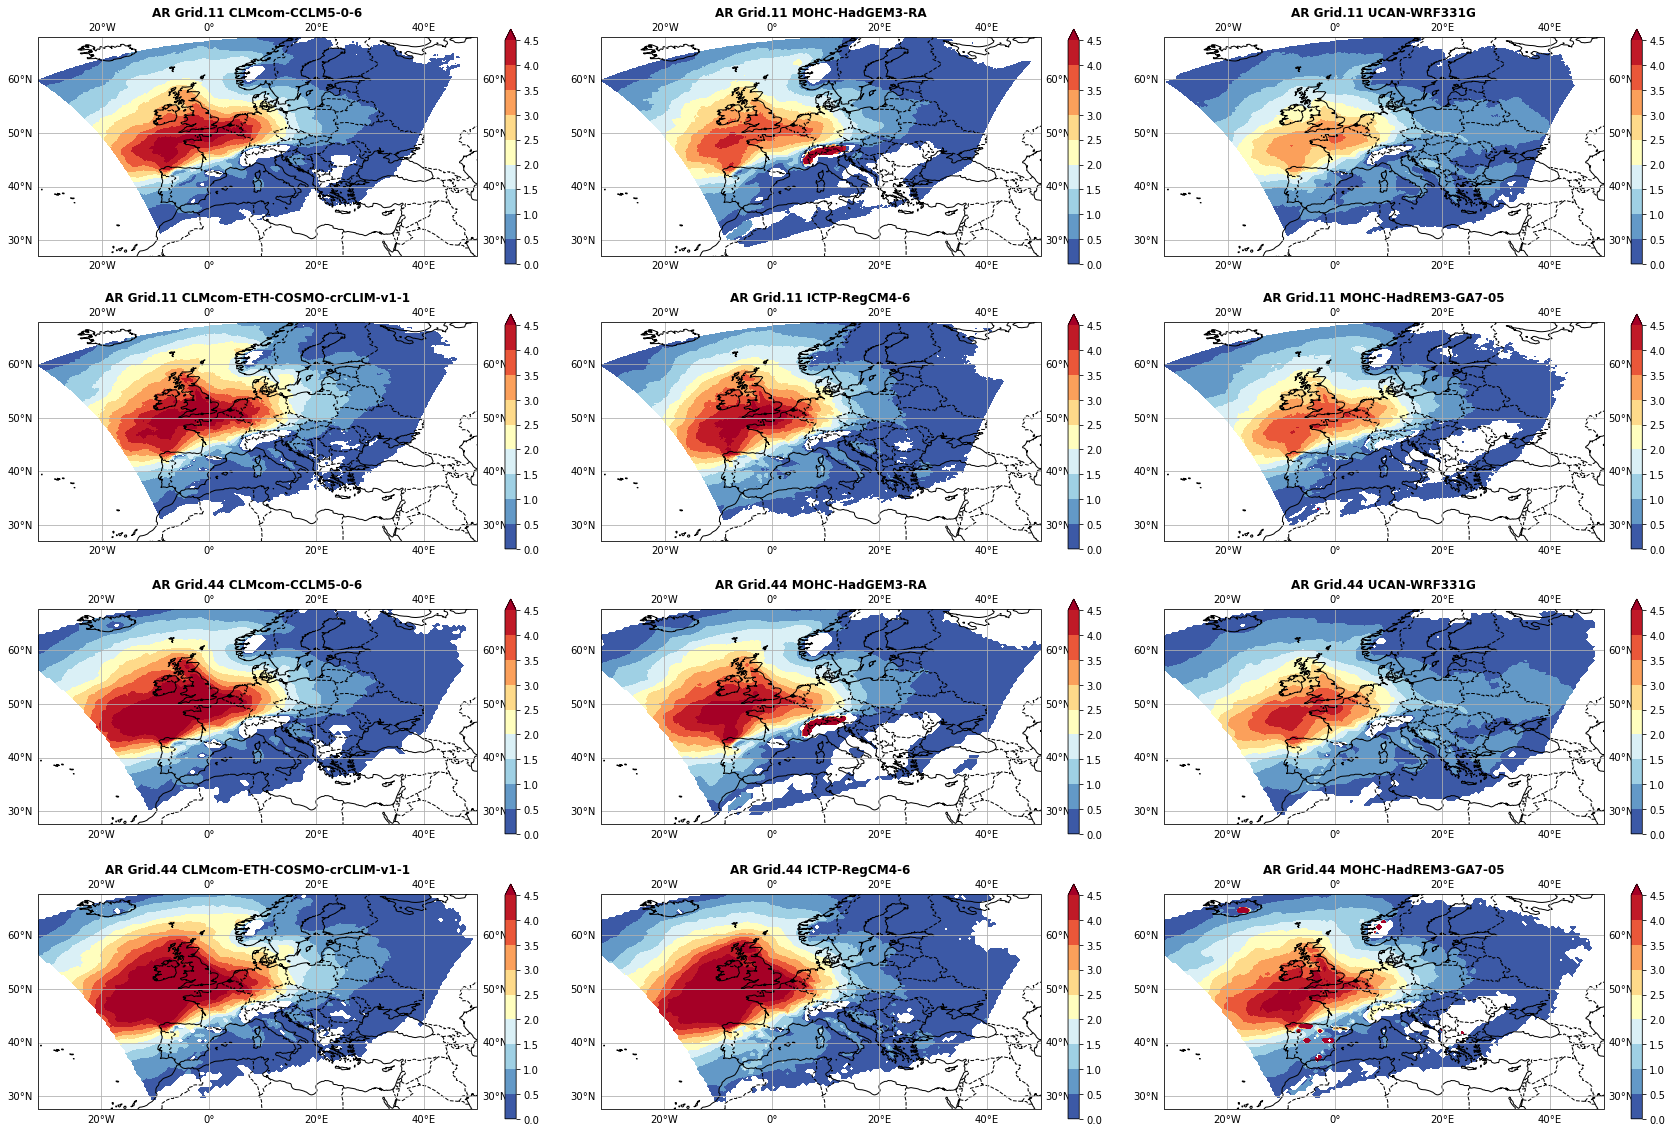

MS


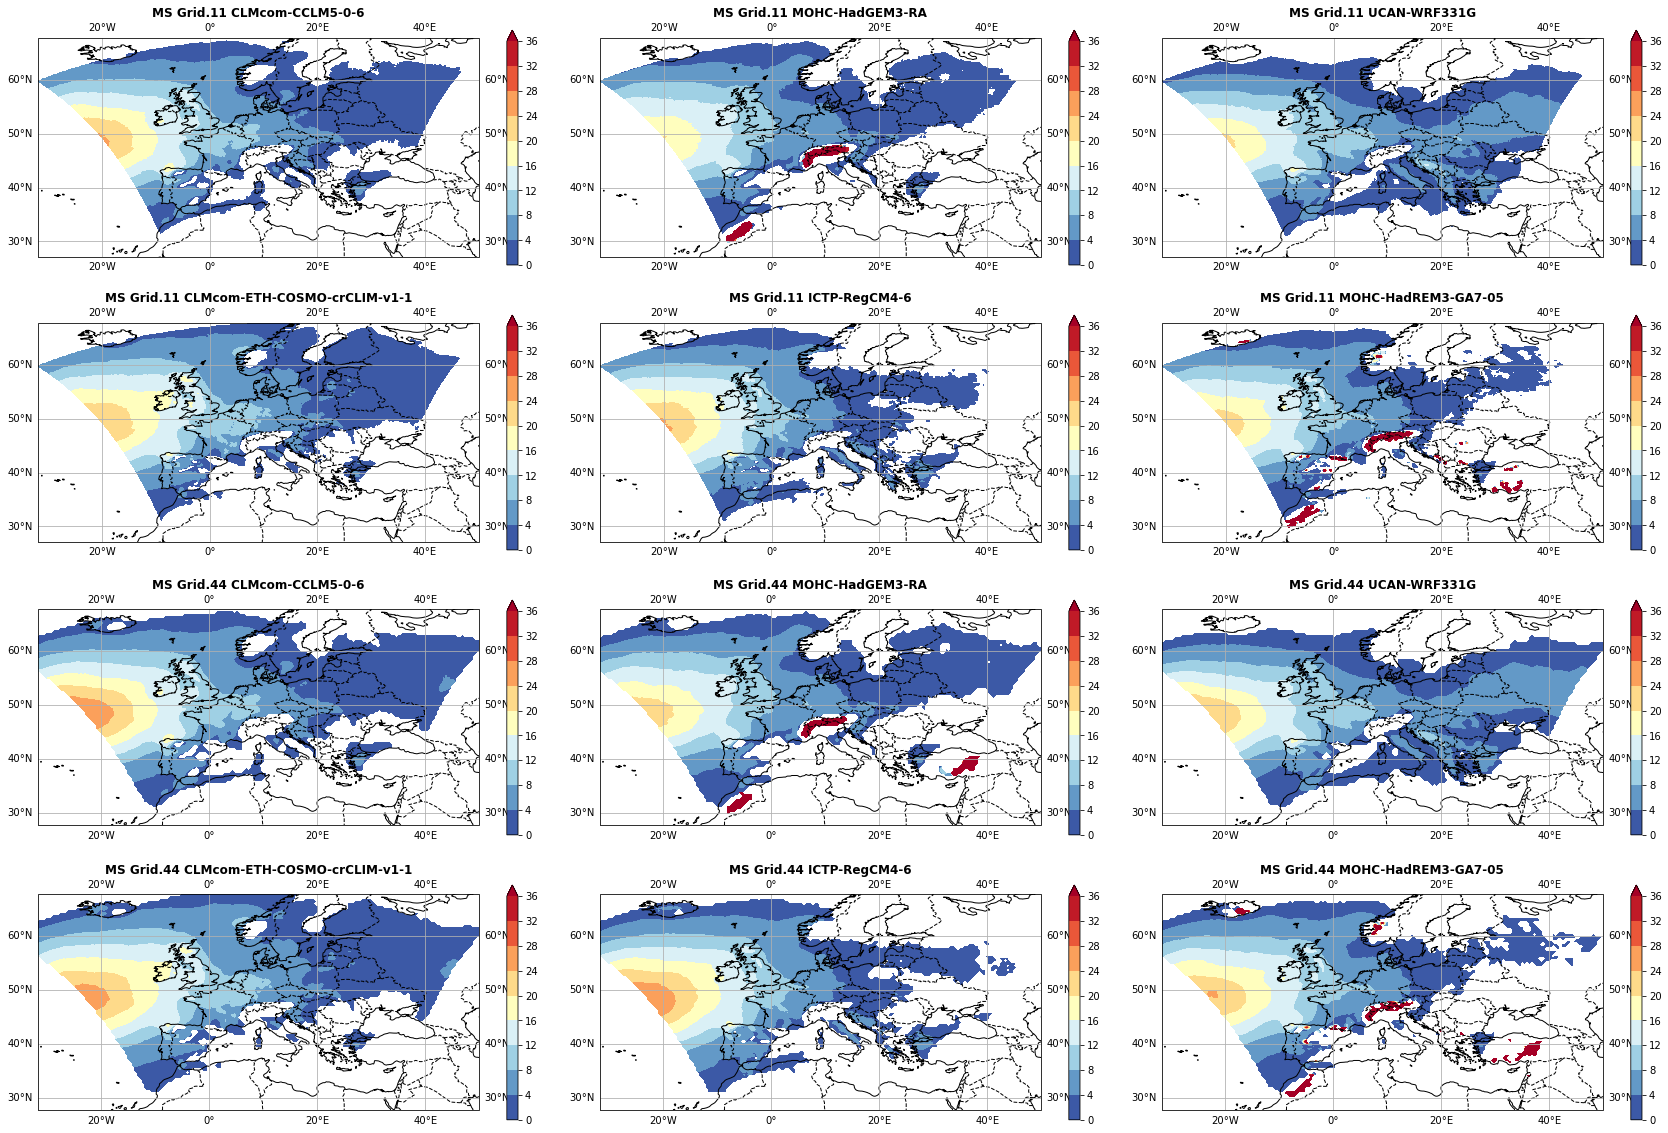

In [13]:
for obj in range( n_obj): 
    fig, ax = plt.subplots(4, 3, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(24,16))
    print(Objects[obj])
  
    # plot grid.11 
    for ds in range(6):
        nr = int(ds/3)
        nc = int((ds%3))
        
        DATAse = ObjectFrequency_11[ds,:,:,Objects.index(Objects[obj])]
        DATAse[DATAse < MIN[obj]] = np.nan     
             
        im=ax[nr,nc].contourf(Lon_11, Lat_11, DATAse, transform=ccrs.PlateCarree(), 
                               add_colorbar=True,levels=level_s[obj],extend='max', cmap='RdYlBu_r')
        fig.colorbar(im, ax=ax[nr,nc], shrink=0.9)
        ax[nr,nc].coastlines()
        ax[nr,nc].add_feature(cartopy.feature.BORDERS, linestyle='--') 
         
        ax[nr][nc].set_title(Objects[obj] + " Grid.11 " + dataset[ds][31:], fontweight='bold')#, color= 'blue')
        xl = ax[nr,nc].gridlines(draw_labels=True)
    
    # plot grid.44
    for ds in range(6):
        nr = int(ds/3) + 2
        nc = int((ds%3))
        
        DATAse = ObjectFrequency_44[ds,:,:,Objects.index(Objects[obj])]
        DATAse[DATAse < MIN[obj]] = np.nan     
             
        im=ax[nr,nc].contourf(Lon_44, Lat_44, DATAse, transform=ccrs.PlateCarree(), 
                               add_colorbar=True,levels=level_s[obj],extend='max', cmap='RdYlBu_r')
        fig.colorbar(im, ax=ax[nr,nc], shrink=0.9)
        ax[nr,nc].coastlines()
        ax[nr,nc].add_feature(cartopy.feature.BORDERS, linestyle='--') 
         
        ax[nr][nc].set_title(Objects[obj] + " Grid.44 " + dataset[ds][31:], fontweight='bold')#, color= 'blue')
        xl = ax[nr,nc].gridlines(draw_labels=True)    
    plt.tight_layout()
    plt.savefig(Objects[obj]+'.png')
    ### seperate plots
    plt.show()